## Driver code generating brain-maps

### Steps
- import stat csvs 
- visualize quantitative performance  
- visualize brain regions

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import itertools
import pickle
import time

import matplotlib.pyplot as plt
import seaborn as sns

import nibabel as nib
from surfer import Brain
from mayavi import mlab

mlab.init_notebook()
mlab.options.offscreen = True

%env SUBJECTS_DIR=/home/nikhil/projects/CT_reproduce/data/fs_test_dir/

sys.path.append('../')
from lib.plot_utils import *

Notebook initialized with x3d backend.
env: SUBJECTS_DIR=/home/nikhil/projects/CT_reproduce/data/fs_test_dir/


### Data paths

In [2]:
proj_dir = '/home/nikhil/projects/CT_reproduce/code/compare-surf-tools/'
data_dir = proj_dir + 'data/'
results_dir = data_dir + 'results/'
brainmaps_dir = results_dir + 'brainmaps/'
demograph_file = 'ABIDE_Phenotype.csv'
sm_perf_file = 'atlas_sm_perf_DX_GROUP.pkl'


### Global Vars

In [3]:
subject_ID_col = 'SubjID'
subjects_dir = '/home/nikhil/projects/CT_reproduce/data/fs_test_dir/'
subject_id = "fsaverage"

### Load data

In [4]:
# Demographics and Dx
demograph = pd.read_csv(data_dir + demograph_file)
demograph = demograph.rename(columns={'Subject_ID':subject_ID_col})

# # Results
with open(results_dir + sm_perf_file, 'rb') as handle:
    stat_perf_dict = pickle.load(handle)

### Statistical plots 

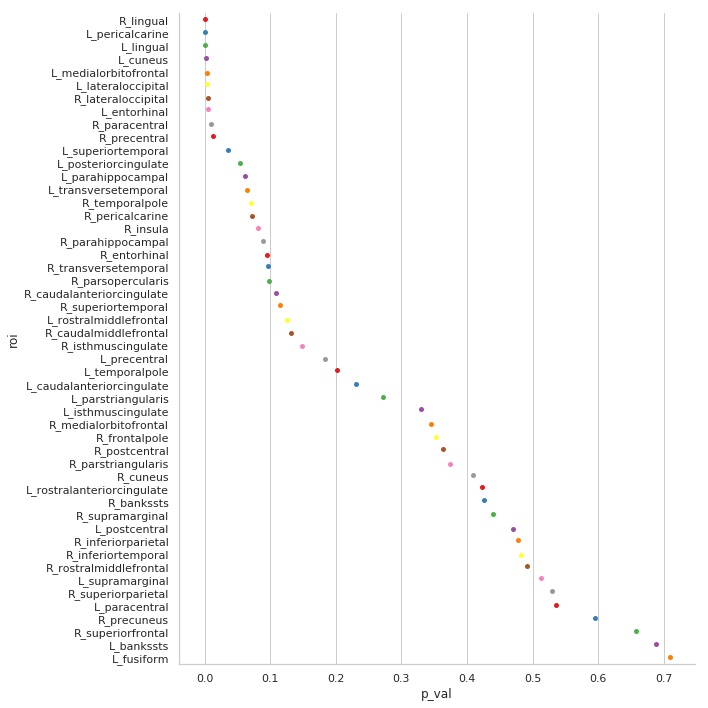

In [5]:
# Plots
aparc = 'aparc'
top_rois = 50
plot_df = stat_perf_dict[aparc].sort_values(by=['p_val']).head(top_rois)

sns.set(font_scale=1)
with sns.axes_style("whitegrid"):
    g = sns.catplot(x='p_val',y='roi',kind='strip',
                    data=plot_df,palette='Set1',height=10)
    #g.set(xscale="log");

## PySurfer 

In [6]:
aparc = 'aparc'
p_thresh = 0.05
stat_df = stat_perf_dict[aparc]
signific_rois = stat_df[stat_df['p_val'] < p_thresh]['roi'].values
print('Number of signficant ROIs {}'.format(len(signific_rois)))

plot_regions_L,plot_regions_R = get_pysurfer_label_format(signific_rois,aparc)
print('plot regions \nleft: {}, \nright: {}'.format(plot_regions_L,plot_regions_R))


# Pysurfer parameters
surf = 'inflated' #'white' #"inflated"
views = ['lateral','medial']
save_dir = brainmaps_dir

if aparc == 'Glasser':
    aparc_file = '.HCP-MMP1.annot' 
elif aparc == 'Destrieux':
    aparc_file = '.aparc.a2009s.annot' 
elif aparc in ['aparc', 'DKT']:
    aparc_file = '.aparc.annot'
else:
    print('Unknown cortical parcellation')
    
for hemi in ['lh','rh']:
    if hemi=='lh':
        signific_rois = plot_regions_L
    elif hemi=='rh':
        signific_rois = plot_regions_R
    else: 
        print('Unknown hemisphere parameter')

    for view in views:
        title = '{}_{}_{}_{}'.format(aparc,surf,hemi,view)
        brain_fig = create_surface_plot(subject_id,hemi,surf,aparc_file,signific_rois,save_dir,title,view)
        time.sleep(5) #Mayavi messes up if called to quickly

Number of signficant ROIs 11
plot regions 
left: ['cuneus', 'entorhinal', 'lateraloccipital', 'lingual', 'medialorbitofrontal', 'pericalcarine', 'superiortemporal'], 
right: ['lateraloccipital', 'lingual', 'paracentral', 'precentral']
number of total vertices 163842 and ROIs 36
number of significant rois 7
{0.0: 124803, 2.0: 1630, 3.0: 1102, 4.0: 6379, 5.0: 4205, 6.0: 2653, 7.0: 1912, 8.0: 7271, -1.0: 13887}
colormap sequential: [-1.00e+00, 3.50e+00, 8.00e+00] (opaque)
Image saved at /home/nikhil/projects/CT_reproduce/code/compare-surf-tools/data/results/brainmaps/surfaparc_inflated_lh_lateral.png
number of total vertices 163842 and ROIs 36
number of significant rois 7
{0.0: 124803, 2.0: 1630, 3.0: 1102, 4.0: 6379, 5.0: 4205, 6.0: 2653, 7.0: 1912, 8.0: 7271, -1.0: 13887}
colormap sequential: [-1.00e+00, 3.50e+00, 8.00e+00] (opaque)
Image saved at /home/nikhil/projects/CT_reproduce/code/compare-surf-tools/data/results/brainmaps/surfaparc_inflated_lh_medial.png
number of total vertices 1

In [ ]:
['G_and_S_frontomargin', Only sulc
 'G_and_S_transv_frontopol', Y
 'G_cingul_Post_ventral', Y
 'G_cuneus', Y
 'G_Ins_lg_and_S_cent_ins', Y
 'G_oc_temp_med_Lingual',  Y
 'G_oc_temp_med_Parahip', Y
 'G_rectus', N
 'G_temp_sup_G_T_transv', Y
 'G_temp_sup_Lateral', Y
 'Pole_occipital', Y
 'S_calcarine', Y
 'S_circular_insula_inf', Y
 'S_orbital_med_olfact', N
 'S_suborbital' N] 